<a href="https://colab.research.google.com/github/semeyers/Telco-Churn-Analysis/blob/main/Simon_Meyers_Telco_Assignment_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #2D2926; text-align: center; line-height: 0.55;background-color: #E94B3C"><b>Telco Customer Churn Classification</b><br></h1>

<center>
    <img src="https://usercontent.one/wp/www.alltopeverything.com/wp-content/uploads/2021/08/telecommunications-3840285_1280.jpg?media=1659724391" alt="Telco Customer Churn" width="50%">
</center>

### **Problem Statement:**

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

### **Objectives:**
- To classify the potential churn customers based on numerical and categorical features.
- Develop a **binary classification** model.
- Implement strategies to handle class imbalance (if it will improve model performance)
- Analyze the impact of hyperparameters on model performance.
- Incorporate preprocessing and feature engineering techniques to enhance model performance.



### **Expected Notebook Contents:**
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Feature Engineering (and Selection if possible)
- Imbalance Handling
- Modeling and Hyper-Parameter Tuning.
- Experiment tracking with Mlflow.
- Conclusion



### Lets get started!


### **Dataset Attributes**
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

## **Load the Dataset**

**To begin with, we will mount our drive.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Ensure that you place a shortcut to the datasets folder in your drive.**

In [2]:
import os
os.chdir("/content/drive/MyDrive/datasets/")

Now let's proceed to load the datasets of interest

### Import the Necessary Libraries :

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
# Step 1: Access and Load the dataset
data = pd.read_csv('Telco_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*Your Analysis*

In [5]:
# Step 2: Confirm that the dataset is complete and free of errors.
print("Initial Data Overview:")
print(data.info())
print(data.isnull().sum())
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7

In [10]:
# Step 3: Address Missing Data through appropriate imputation techniques
num_imputer = SimpleImputer(strategy='mean')  # For numerical columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in numerical_cols:
    data[col] = num_imputer.fit_transform(data[[col]])

for col in categorical_cols:
    data[col] = cat_imputer.fit_transform(data[[col]]).ravel()



In [ ]:
# Step 4: Peform Exploratory Data Analysis (EDA)

plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Looking into class imbalance
sns.countplot(data['Churn'])
plt.title('Churn Class Distribution')
plt.show()

print(data['Churn'].value_counts(normalize=True))

In [ ]:
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


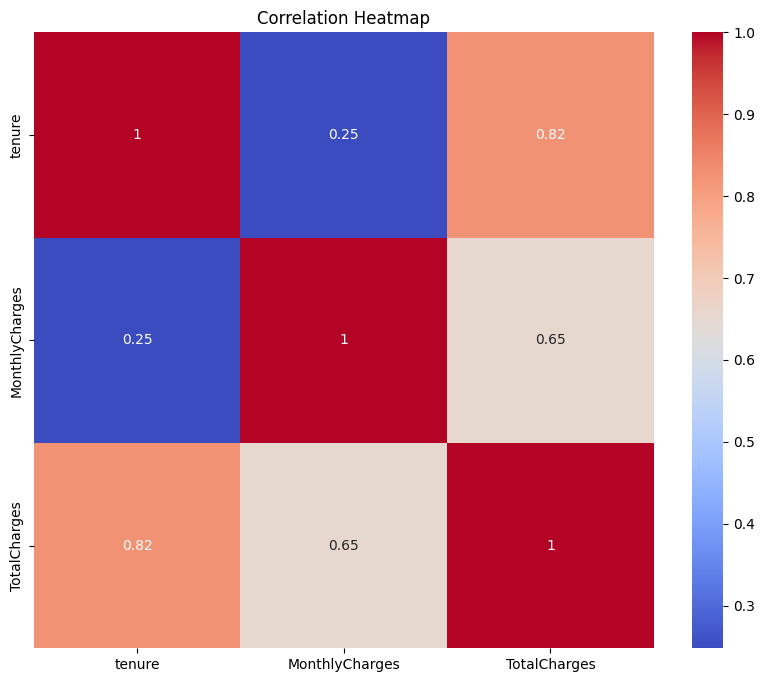

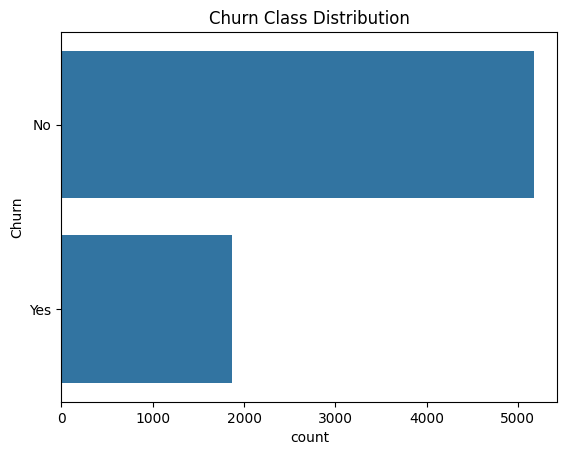

Churn
No    0.73
Yes   0.27
Name: proportion, dtype: float64


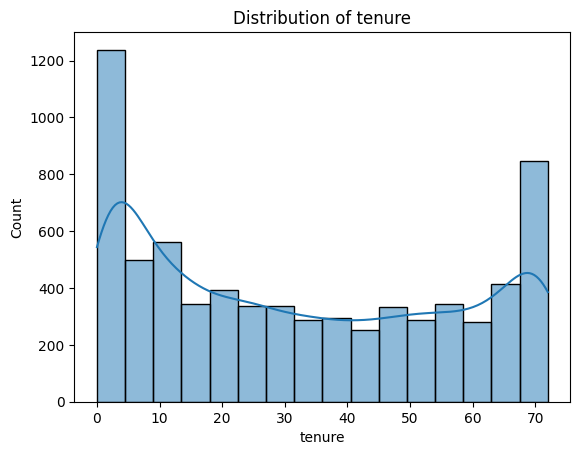

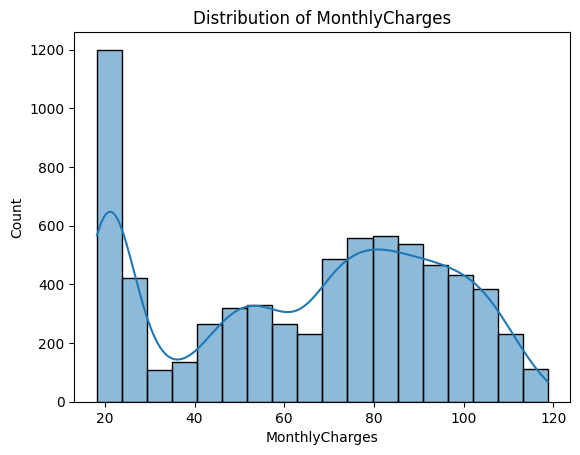

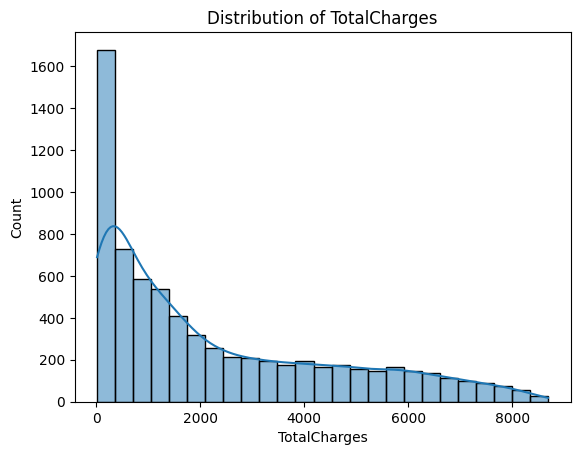

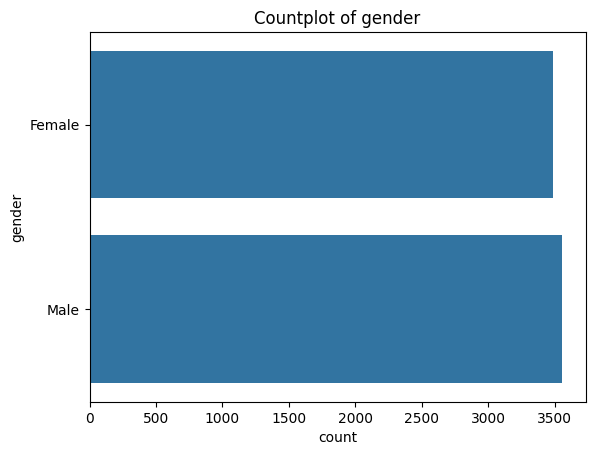

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7dd37ec524d0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7dd37ec511b0> (for post_execute):


KeyboardInterrupt: 

In [26]:
for col in categorical_cols:
    sns.countplot(data[col])
    plt.title(f"Countplot of {col}")
    plt.show()



In [ ]:
# Step 5: Apply Preprocessing and Feature Engineering

In [16]:
# Step 6: Normalize or scale numerical features as needed
scaler = StandardScaler()
data_scaled = pd.DataFrame(
    scaler.fit_transform(data[numerical_cols]),
    columns=numerical_cols,
    index=data.index
)

In [18]:
# Step 7: Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
data_encoded = pd.DataFrame(
    encoder.fit_transform(data[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=data.index
)

data_final = pd.concat([data_scaled, data_encoded, data['Churn']], axis=1)

In [19]:
# Step 8: Generate new features that could improve model performance (e.g., polynomial features, domain-specific features).

data_final['AvgMonthlyCharge'] = data_final['TotalCharges'] / data_final['tenure']

data_final['TenureCategory'] = pd.cut(
    data['tenure'],
    bins=[0, 12, 36, 72],
    labels=['New', 'Mid-Term', 'Long-Term'],
    right=False
)

In [25]:
# Step 9: Save the cleaned dataset
output_path = '/content/drive/MyDrive/datasets/cleaned_Telco_churn.csv'
data_final.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")

OSError: [Errno 30] Read-only file system: '/content/drive/MyDrive/datasets/cleaned_telco_data.csv'

## About the dataset and project

- This dataset contains customer information for a telecommunications company.
- The goal is to use the data to predict customer churn, which is whether a customer will stop using the company's services.
- It includes both numerical and categorical features like tenure, charges, and service details.

##Preprocessing Steps and Justifications

1. Loading and Understanding the Dataset:
Loaded the dataset into a Pandas DataFrame.

2. Handling Missing Data:
Converted TotalCharges to numeric.
Used the mean to impute missing values for numerical columns.
Used the most frequent value to impute missing values for categorical columns.

3. Exploratory Data Analysis (EDA):
Visualized distributions of numerical features using histograms and density plots.
Analyzed correlations between numerical features with a heatmap.
Used count plots to understand the distribution of categorical variables.

4. Normalizing Numerical Features:
Applied StandardScaler to scale numerical columns (tenure, MonthlyCharges, and TotalCharges).

5. Encoding Categorical Variables:
Used OneHotEncoder to encode categorical variables because it converts categorical data into a format that machine learning models can process.

6. Feature Engineering:
Created AvgMonthlyCharge as TotalCharges / tenure because AvgMonthlyCharge provides a feature related to customer spending behavior.
Categorized tenure into TenureCategory with bins for 'New', 'Mid-Term', and 'Long-Term' customers because TenureCategory adds interpretability and improves the model's ability to generalize.

7. Finalizing the Processed Dataset:
Action: Combined scaled numerical features, encoded categorical features, and engineered features into a single dataset. Saved the cleaned dataset as cleaned_Telco_churn.csv.


Additional Notes:
Any potential class imbalance will be addressed in the modeling phase using techniques like SMOTE.